# Be Suspicious Of Online Movie Ratings, Especially Fandango’s
### https://fivethirtyeight.com/features/fandango-movies-ratings/

#### data downloaded from: https://github.com/fivethirtyeight/data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# fandango movie ratings
df = pd.read_csv('fandango_scrape.csv')

In [8]:
df.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
STARS,504.0,3.558532,1.563133,0.0,3.5,4.0,4.50,5.0
RATING,504.0,3.375794,1.491223,0.0,3.1,3.8,4.30,5.0
VOTES,504.0,1147.863095,3830.583136,0.0,3.0,18.5,189.75,34846.0


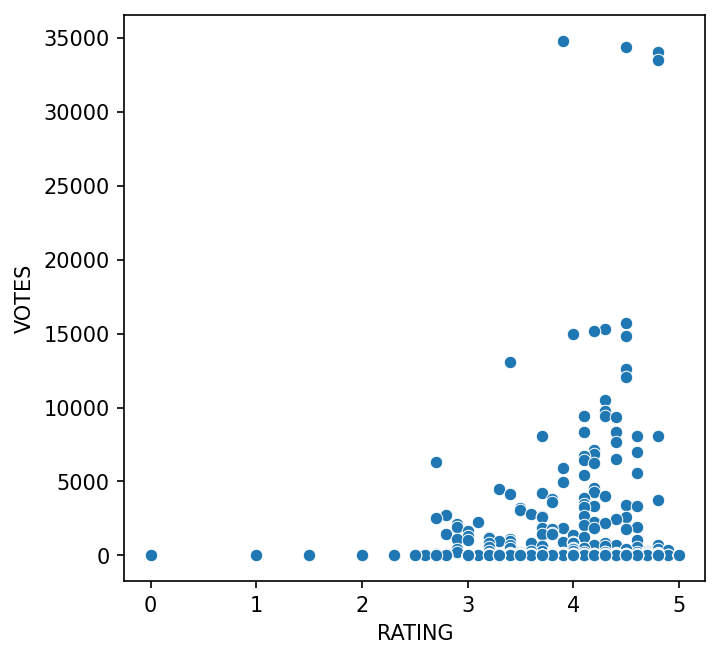

In [14]:
plt.figure(figsize=(5,5),dpi=150)
sns.scatterplot(data=df,x='RATING',y='VOTES')

In [15]:
df.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


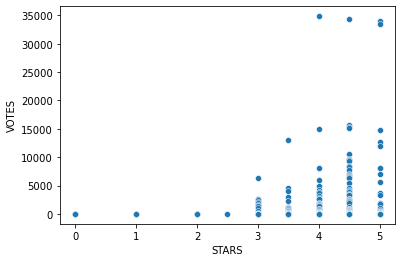

In [16]:
sns.scatterplot(data=df,x='STARS', y='VOTES')

In [22]:
def get_year(title):
    title = title.split('(')
    return int(title[-1][:-1])

In [23]:
df['YEAR'] = np.vectorize(get_year)(df['FILM'])

In [25]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [27]:
df['YEAR'].value_counts()

2015    478
2014     23
2016      1
2012      1
1964      1
Name: YEAR, dtype: int64

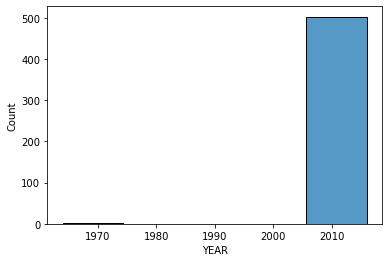

In [31]:
sns.histplot(data=df,x='YEAR',bins=5)

In [34]:
df.sort_values('VOTES')[-10:]

,FILM,STARS,RATING,VOTES,YEAR
9,Into the Woods (2014),3.5,3.4,13055,2014
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
7,Minions (2015),4.0,4.0,14998,2015
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
4,Inside Out (2015),4.5,4.5,15749,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
2,American Sniper (2015),5.0,4.8,34085,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015


In [35]:
# number of movies with 0 votes
len(df[df['VOTES']==0])

69

In [37]:
#only keep reviewed movies
df = df[df['VOTES'] != 0]

In [38]:
len(df[df['VOTES']==0])

0

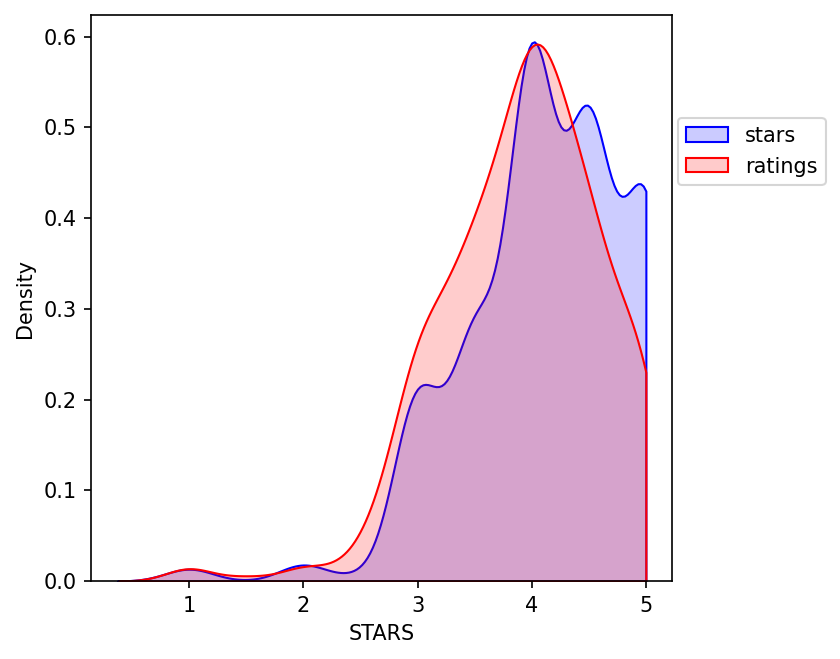

In [61]:
plt.figure(figsize=(5,5),dpi=150)
sns.kdeplot(data=df,x='STARS',clip=[0,5],fill=True,color='b',label='stars',alpha=0.2)
sns.kdeplot(data=df,x='RATING',clip=[0,5],fill=True,color='r',label='ratings',alpha=0.2)
plt.legend(loc=(1.01,0.7))

In [67]:
# difference between stars and ratings
df['difference'] = np.round(df['STARS'] - df['RATING'],2)

In [68]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,difference
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


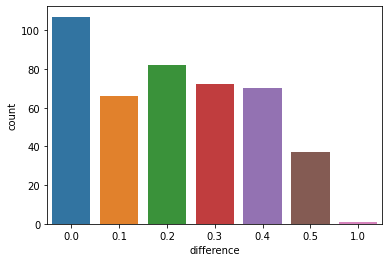

In [70]:
sns.countplot(data=df,x='difference')

In [72]:
# The movie with difference of 1 between its rating and stars
df[df['difference'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,difference
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [73]:
# another movie rating dataset
df2 = pd.read_csv('all_sites_scores.csv')

In [74]:
df2.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


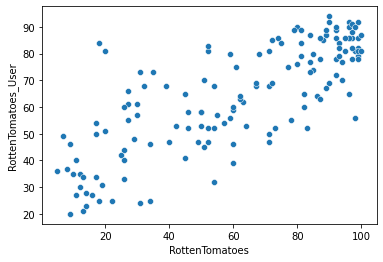

In [76]:
sns.scatterplot(data=df2, x = 'RottenTomatoes',y='RottenTomatoes_User')

In [77]:
# difference between critics ratings and users ratings
df2['RottenDiff'] = df2['RottenTomatoes'] - df2['RottenTomatoes_User']

In [81]:
np.abs(df2['RottenDiff']).mean()

15.095890410958905

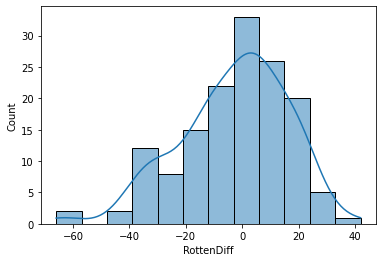

In [83]:
sns.histplot(data=df2,x='RottenDiff',kde=True)

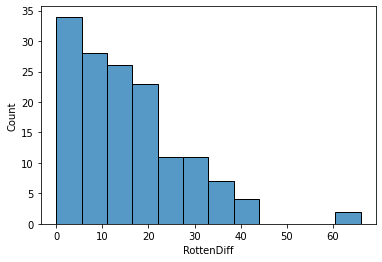

In [84]:
diff = np.abs(df2['RottenDiff'])
sns.histplot(diff)

In [86]:
# movies that users love but critics hate
df2.sort_values('RottenDiff')[:10]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenDiff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39
132,Max (2015),35,73,47,5.9,7.0,15,5444,-38
19,Pixels (2015),17,54,27,5.3,5.6,246,19521,-37
15,Taken 3 (2015),9,46,26,4.6,6.1,240,104235,-37
51,Entourage (2015),32,68,38,5.2,7.1,96,21914,-36
49,Terminator Genisys (2015),26,60,38,6.4,6.9,779,85585,-34


In [87]:
# movies that critics love but users hate
df2.sort_values('RottenDiff')[-10:]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenDiff
11,Black Sea (2015),82,60,62,6.6,6.4,37,16547,22
87,Maggie (2015),54,32,52,6.5,5.6,90,18986,22
7,Top Five (2014),86,64,81,6.8,6.5,124,16876,22
90,The SpongeBob Movie: Sponge Out of Water (2015),78,55,62,6.5,6.1,196,26046,23
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24
145,"Kumiko, The Treasure Hunter (2015)",87,63,68,6.4,6.7,19,5289,24
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42


In [88]:
# fandango vs all sites
df3 = df.merge(df2,on='FILM',how='inner')

In [92]:
df3['RottenTomatoes'] = df3['RottenTomatoes']/20
df3['RottenTomatoes_User'] = df3['RottenTomatoes_User']/20
df3['Metacritic'] = df3['Metacritic'] / 20
df3['Metacritic_User'] = df3['Metacritic_User']/2

In [93]:
df3.head()

,FILM,STARS,RATING,VOTES,YEAR,difference,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RottenDiff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,1.25,2.10,2.30,1.60,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,3.55,4.05,2.95,3.50,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,3.60,4.25,3.60,3.30,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,4.05,4.20,3.35,3.40,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,4.90,4.50,4.70,4.45,8.6,807,96252,8


In [94]:
scores = df3[['FILM','STARS','RATING','RottenTomatoes','RottenTomatoes_User','Metacritic','Metacritic_User']]

In [96]:
scores.head()

,FILM,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User
0,Fifty Shades of Grey (2015),4.0,3.9,1.25,2.10,2.30,1.60
1,Jurassic World (2015),4.5,4.5,3.55,4.05,2.95,3.50
2,American Sniper (2015),5.0,4.8,3.60,4.25,3.60,3.30
3,Furious 7 (2015),5.0,4.8,4.05,4.20,3.35,3.40
4,Inside Out (2015),4.5,4.5,4.90,4.50,4.70,4.45


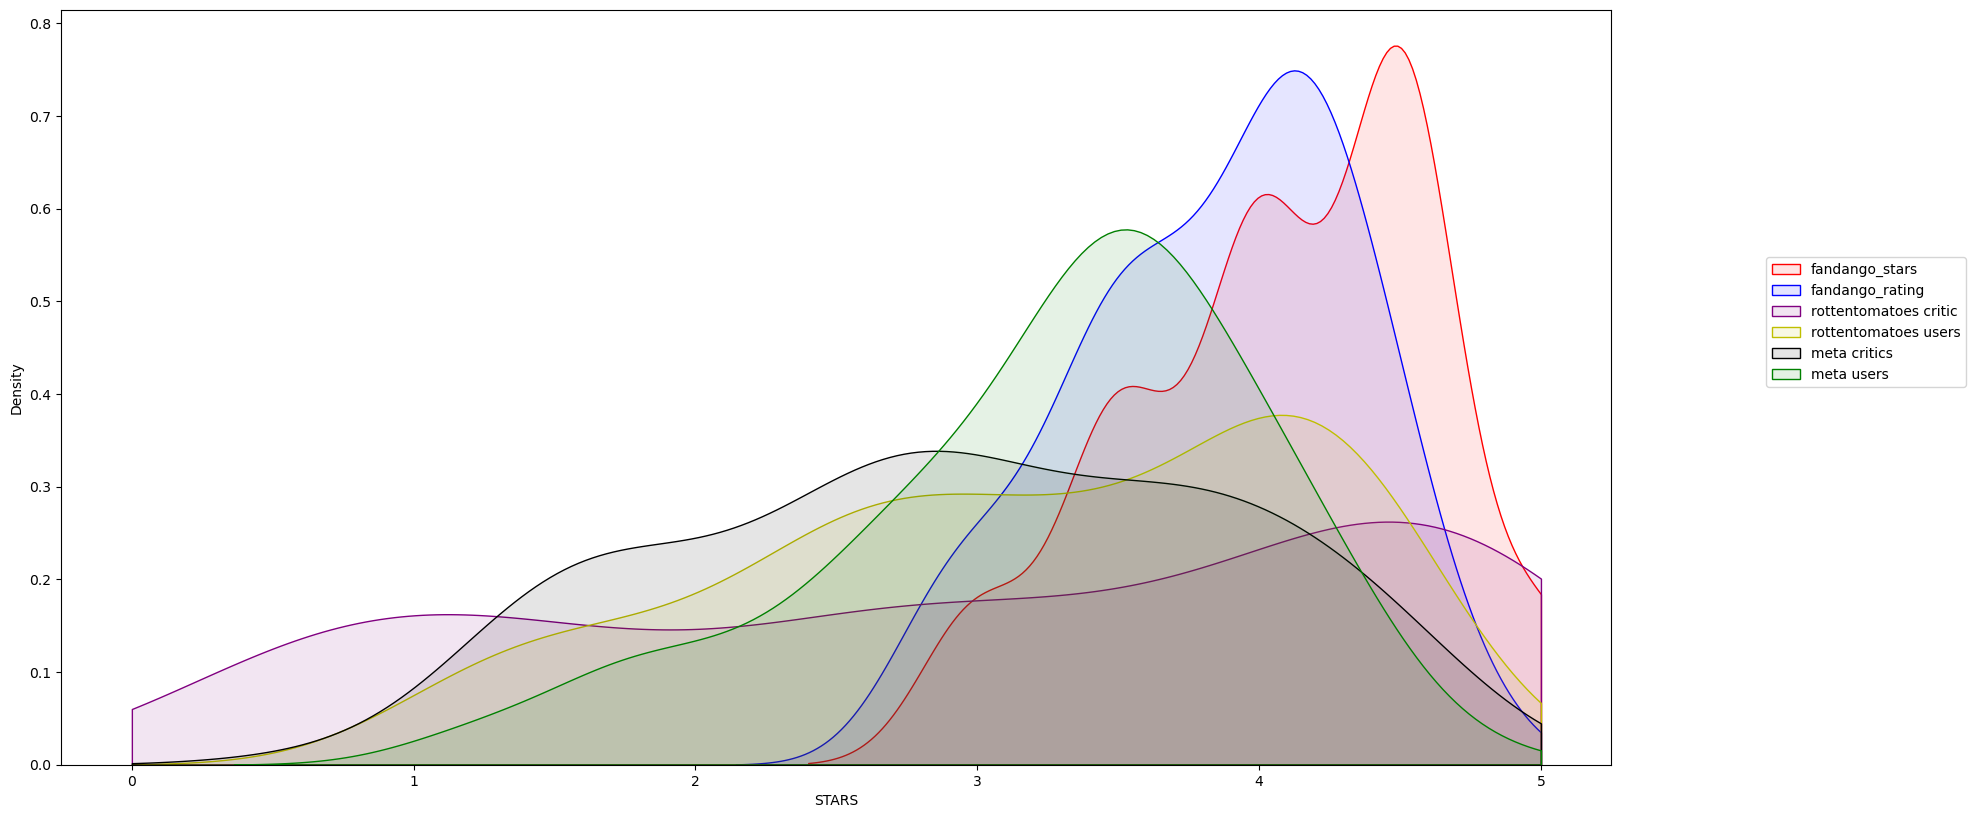

In [104]:
plt.figure(figsize=(20,10),dpi=100)
sns.kdeplot(data=scores,x='STARS',color='r',label='fandango_stars',fill=True,clip=[0,5],alpha=0.1)
sns.kdeplot(data=scores,x='RATING',color='b',label='fandango_rating',fill=True,clip=[0,5],alpha=0.1)
sns.kdeplot(data=scores,x='RottenTomatoes',color='purple',label='rottentomatoes critic',fill=True,clip=[0,5],alpha=0.1)
sns.kdeplot(data=scores,x='RottenTomatoes_User',color='y',label='rottentomatoes users',fill=True,clip=[0,5],alpha=0.1)
sns.kdeplot(data=scores,x='Metacritic',color='k',label='meta critics',fill=True,clip=[0,5],alpha=0.1)
sns.kdeplot(data=scores,x='Metacritic_User',color='g',label='meta users',fill=True,clip=[0,5],alpha=0.1)
plt.legend(loc=(1.1,0.5))

According to the plot shown above, fandango clearly has a biased scoring and it leans toward high ratings for all movies.